# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

/Users/hahaha/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp(input_shape, output_units = 10, num_neurons = [256, 128, 64]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units, activation = 'relu', name = "hidden_layer"+str(i+1))(input_layer)
        else: 
            x = keras.layers.Dense(units = n_units, activation = 'relu', name = "hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units = output_units, activation = 'softmax', name = "output")(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
            
    return model

In [9]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-3, 1e-5]
EPOCHS = 50 
BATCH_SIZE = 256 
MOMENTUM = 0.95

optimizers = ['sgd', 'rmsprop', 'adagrad', 'adam']

In [11]:
from itertools import product
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr, opt in product(LEARNING_RATE, optimizers): 
    keras.backend.clear_session()
    print(f"Experiment with LR = {lr} and optimizer = {opt}")
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()
    
    if opt == 'sgd':
        optimizer = keras.optimizers.SGD(lr = lr, momentum = MOMENTUM)
    elif opt == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(lr = lr)
    elif opt == 'adagrad':
        optimizer = keras.optimizers.Adagrad(lr = lr)
    elif opt == 'adam':
        optimizer = keras.optimizers.Adam(lr = lr)
    else:
        print('Invalid optimizer')
        break
    
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)
    model.fit(x_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_data = (x_test, y_test), shuffle = True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp_name_tag = "exp-lr-%s-%s" % (str(lr), opt)
    results[exp_name_tag] = {"train-loss": train_loss, "valid-loss": valid_loss, "train-acc": train_acc, "valid-acc": valid_acc}


Experiment with LR = 0.1 and optimizer = sgd
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [

50000/50000 [==============================] - 5s 96us/step - loss: 2.3046 - accuracy: 0.0989 - val_loss: 2.3041 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.3044 - accuracy: 0.0992 - val_loss: 2.3046 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 4s 85us/step - loss: 2.3046 - accuracy: 0.0995 - val_loss: 2.3036 - val_accuracy: 0.1000
Experiment with LR = 0.1 and optimizer = rmsprop
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
________________________________________

50000/50000 [==============================] - 5s 101us/step - loss: 2.3080 - accuracy: 0.0991 - val_loss: 2.3114 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.3078 - accuracy: 0.0979 - val_loss: 2.3157 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.3083 - accuracy: 0.0986 - val_loss: 2.3078 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.3078 - accuracy: 0.0972 - val_loss: 2.3072 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 5s 98us/step - loss: 2.3075 - accuracy: 0.1010 - val_loss: 2.3109 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.3081 - accuracy: 0.0975 - val_loss: 2.3051 - val_accuracy: 0.1000
Experiment with LR = 0.1 and optimizer = adagrad
Model: "model_1"
_________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.4634 - accuracy: 0.4759 - val_loss: 1.5484 - val_accuracy: 0.4538
Epoch 44/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.4549 - accuracy: 0.4802 - val_loss: 1.5562 - val_accuracy: 0.4467
Epoch 45/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.4500 - accuracy: 0.4825 - val_loss: 1.5761 - val_accuracy: 0.4390
Epoch 46/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.4469 - accuracy: 0.4823 - val_loss: 1.5589 - val_accuracy: 0.4392
Epoch 47/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.4445 - accuracy: 0.4850 - val_loss: 1.5345 - val_accuracy: 0.4551
Epoch 48/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.4403 - accuracy: 0.4863 - val_loss: 1.5384 - val_accuracy: 0.4538
Epoch 49/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.4394 - accuracy: 0.4883 - val_

Epoch 41/50
50000/50000 [==============================] - 5s 91us/step - loss: 2.3075 - accuracy: 0.0990 - val_loss: 2.3181 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.3067 - accuracy: 0.0984 - val_loss: 2.3069 - val_accuracy: 0.1000 0s - l
Epoch 43/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.3065 - accuracy: 0.1006 - val_loss: 2.3063 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 5s 91us/step - loss: 2.3066 - accuracy: 0.1024 - val_loss: 2.3051 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.3067 - accuracy: 0.1005 - val_loss: 2.3091 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.3070 - accuracy: 0.0964 - val_loss: 2.3072 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.3068 - accuracy: 0.0999

50000/50000 [==============================] - 4s 72us/step - loss: 1.1611 - accuracy: 0.5880 - val_loss: 1.3639 - val_accuracy: 0.5219
Epoch 39/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.1513 - accuracy: 0.5925 - val_loss: 1.3430 - val_accuracy: 0.5317
Epoch 40/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.1548 - accuracy: 0.5879 - val_loss: 1.3452 - val_accuracy: 0.5339
Epoch 41/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.1384 - accuracy: 0.5958 - val_loss: 1.3687 - val_accuracy: 0.5189
Epoch 42/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.1361 - accuracy: 0.5976 - val_loss: 1.4060 - val_accuracy: 0.5071
Epoch 43/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.1266 - accuracy: 0.5996 - val_loss: 1.3707 - val_accuracy: 0.5257
Epoch 44/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.1147 - accuracy: 0.6064 - val_loss: 1.3573

Epoch 36/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.1709 - accuracy: 0.5804 - val_loss: 1.4835 - val_accuracy: 0.4979
Epoch 37/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.1573 - accuracy: 0.5867 - val_loss: 1.6666 - val_accuracy: 0.4450
Epoch 38/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.1495 - accuracy: 0.5891 - val_loss: 1.6080 - val_accuracy: 0.4702
Epoch 39/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.1413 - accuracy: 0.5935 - val_loss: 1.5299 - val_accuracy: 0.4761
Epoch 40/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.1334 - accuracy: 0.5964 - val_loss: 1.5742 - val_accuracy: 0.4791
Epoch 41/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.1275 - accuracy: 0.5973 - val_loss: 1.6072 - val_accuracy: 0.4597
Epoch 42/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.1180 - accuracy: 0.6006 - val_

Epoch 34/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.4583 - accuracy: 0.4918 - val_loss: 1.5018 - val_accuracy: 0.4670
Epoch 35/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.4539 - accuracy: 0.4937 - val_loss: 1.5043 - val_accuracy: 0.4595
Epoch 36/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.4497 - accuracy: 0.4949 - val_loss: 1.4955 - val_accuracy: 0.4712
Epoch 37/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.4459 - accuracy: 0.4968 - val_loss: 1.4891 - val_accuracy: 0.4714
Epoch 38/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.4419 - accuracy: 0.4964 - val_loss: 1.4926 - val_accuracy: 0.4684
Epoch 39/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.4385 - accuracy: 0.4989 - val_loss: 1.4817 - val_accuracy: 0.4763
Epoch 40/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.4346 - accuracy: 0.5010 - val_

Epoch 32/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.1015 - accuracy: 0.6094 - val_loss: 1.4118 - val_accuracy: 0.5053
Epoch 33/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.0972 - accuracy: 0.6100 - val_loss: 1.4243 - val_accuracy: 0.5104
Epoch 34/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.0854 - accuracy: 0.6126 - val_loss: 1.3924 - val_accuracy: 0.5184
Epoch 35/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.0757 - accuracy: 0.6175 - val_loss: 1.3993 - val_accuracy: 0.5151
Epoch 36/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.0757 - accuracy: 0.6167 - val_loss: 1.3776 - val_accuracy: 0.5248
Epoch 37/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.0578 - accuracy: 0.6236 - val_loss: 1.4263 - val_accuracy: 0.5126
Epoch 38/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.0635 - accuracy: 0.6216 - v

Epoch 30/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.0955 - accuracy: 0.2743 - val_loss: 2.0898 - val_accuracy: 0.2876
Epoch 31/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.0895 - accuracy: 0.2767 - val_loss: 2.0838 - val_accuracy: 0.2866
Epoch 32/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.0837 - accuracy: 0.2767 - val_loss: 2.0781 - val_accuracy: 0.2891
Epoch 33/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.0779 - accuracy: 0.2796 - val_loss: 2.0724 - val_accuracy: 0.2897
Epoch 34/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.0723 - accuracy: 0.2809 - val_loss: 2.0667 - val_accuracy: 0.2907
Epoch 35/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.0667 - accuracy: 0.2826 - val_loss: 2.0612 - val_accuracy: 0.2906
Epoch 36/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.0613 - accuracy: 0.2836 - val_

50000/50000 [==============================] - 5s 95us/step - loss: 1.6214 - accuracy: 0.4387 - val_loss: 1.6353 - val_accuracy: 0.4286
Epoch 28/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.6159 - accuracy: 0.4396 - val_loss: 1.6300 - val_accuracy: 0.4327
Epoch 29/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.6098 - accuracy: 0.4421 - val_loss: 1.6232 - val_accuracy: 0.4326
Epoch 30/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.6045 - accuracy: 0.4430 - val_loss: 1.6160 - val_accuracy: 0.4341
Epoch 31/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.5987 - accuracy: 0.4476 - val_loss: 1.6134 - val_accuracy: 0.4327
Epoch 32/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.5934 - accuracy: 0.4485 - val_loss: 1.6060 - val_accuracy: 0.4393
Epoch 33/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.5884 - accuracy: 0.4511 - val_loss: 1.6017

Epoch 25/50
50000/50000 [==============================] - 4s 87us/step - loss: 2.1347 - accuracy: 0.2280 - val_loss: 2.1332 - val_accuracy: 0.2334
Epoch 26/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.1322 - accuracy: 0.2297 - val_loss: 2.1307 - val_accuracy: 0.2343
Epoch 27/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.1297 - accuracy: 0.2310 - val_loss: 2.1282 - val_accuracy: 0.2347
Epoch 28/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.1273 - accuracy: 0.2328 - val_loss: 2.1258 - val_accuracy: 0.2354
Epoch 29/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.1249 - accuracy: 0.2341 - val_loss: 2.1235 - val_accuracy: 0.2367
Epoch 30/50
50000/50000 [==============================] - 4s 84us/step - loss: 2.1227 - accuracy: 0.2356 - val_loss: 2.1213 - val_accuracy: 0.2377
Epoch 31/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.1204 - accuracy: 0.2371 - val_

50000/50000 [==============================] - 4s 90us/step - loss: 1.6315 - accuracy: 0.4341 - val_loss: 1.6374 - val_accuracy: 0.4329
Epoch 23/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.6238 - accuracy: 0.4385 - val_loss: 1.6310 - val_accuracy: 0.4347
Epoch 24/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.6170 - accuracy: 0.4393 - val_loss: 1.6268 - val_accuracy: 0.4383
Epoch 25/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.6097 - accuracy: 0.4424 - val_loss: 1.6189 - val_accuracy: 0.4389
Epoch 26/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.6045 - accuracy: 0.4446 - val_loss: 1.6124 - val_accuracy: 0.4429
Epoch 27/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.5971 - accuracy: 0.4466 - val_loss: 1.6102 - val_accuracy: 0.4437
Epoch 28/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.5905 - accuracy: 0.4502 - val_loss: 1.6043

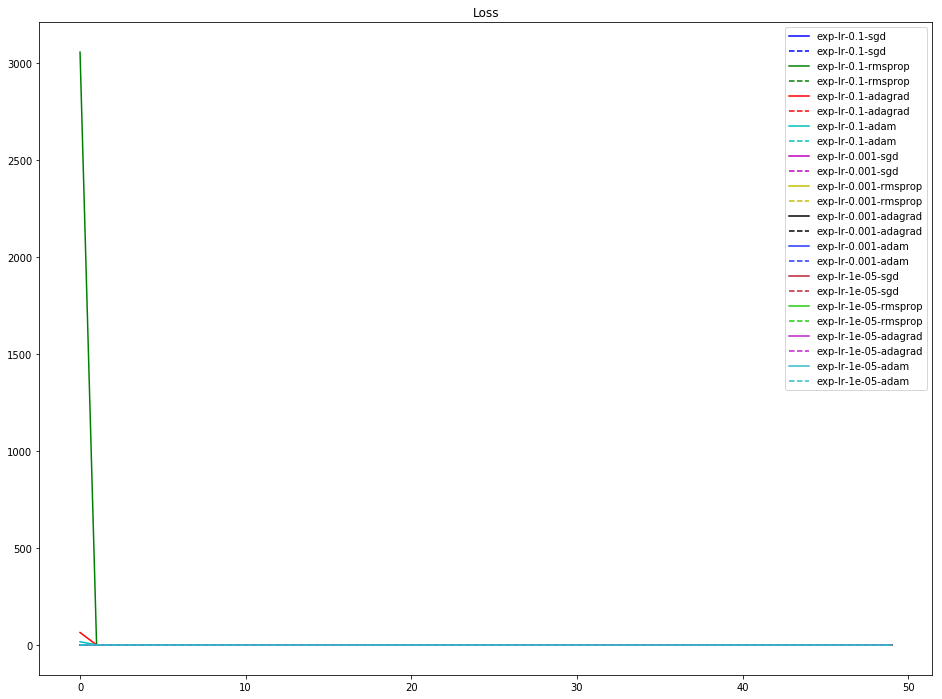

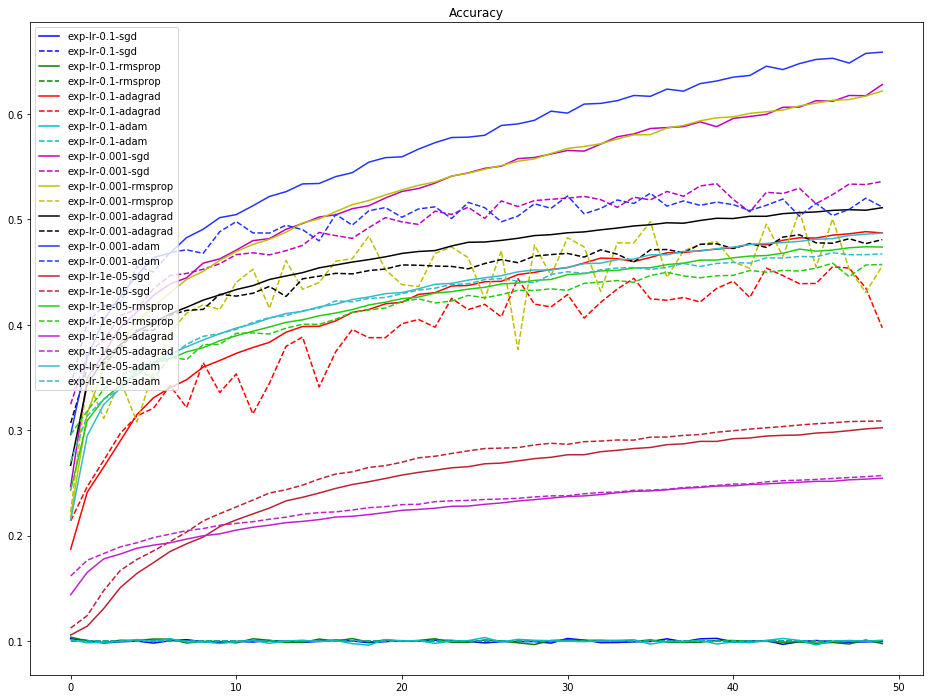

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#2233FF', '#BB2233', '#22CC11', '#BB22CC', '#33BBCC', '#AACC11']

plt.figure(figsize = (16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label = cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label = cond, color = color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize = (16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label = cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label = cond, color = color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()